In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
df = pd.read_csv("Dataset\Admission_Predict_Ver1.1.csv")
df.head()

# Using the second csv file because it is more updated version bro.


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [3]:
# Finding some missing or null values bro
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [4]:
df.duplicated().sum()

np.int64(0)

In [5]:
df.drop(columns=['Serial No.'] , inplace=True)
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
X = df.iloc[:, 0 : 7]
y = df.iloc[:,7]

In [7]:
X

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0
...,...,...,...,...,...,...,...
495,332,108,5,4.5,4.0,9.02,1
496,337,117,5,5.0,5.0,9.87,1
497,330,120,5,4.5,5.0,9.56,1
498,312,103,4,4.0,5.0,8.43,0


In [8]:
y

0      0.92
1      0.76
2      0.72
3      0.80
4      0.65
       ... 
495    0.87
496    0.96
497    0.93
498    0.73
499    0.84
Name: Chance of Admit , Length: 500, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3,random_state=42)


In [10]:
X_train

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
5,330,115,5,4.5,3.0,9.34,1
116,299,102,3,4.0,3.5,8.62,0
45,322,110,5,5.0,4.0,9.10,1
16,317,107,3,4.0,3.0,8.70,0
462,307,105,4,3.0,3.0,7.94,0
...,...,...,...,...,...,...,...
106,329,111,4,4.5,4.5,9.18,1
270,306,105,2,2.5,3.0,8.22,1
348,302,99,1,2.0,2.0,7.25,0
435,309,105,2,2.5,4.0,7.68,0


In [11]:
y_train

5      0.90
116    0.56
45     0.88
16     0.66
462    0.62
       ... 
106    0.87
270    0.72
348    0.57
435    0.55
102    0.62
Name: Chance of Admit , Length: 350, dtype: float64

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [13]:
X_train_scaled

array([[0.78723404, 0.82142857, 1.        , ..., 0.42857143, 0.81410256,
        1.        ],
       [0.12765957, 0.35714286, 0.5       , ..., 0.57142857, 0.58333333,
        0.        ],
       [0.61702128, 0.64285714, 1.        , ..., 0.71428571, 0.73717949,
        1.        ],
       ...,
       [0.19148936, 0.25      , 0.        , ..., 0.14285714, 0.14423077,
        0.        ],
       [0.34042553, 0.46428571, 0.25      , ..., 0.71428571, 0.28205128,
        0.        ],
       [0.44680851, 0.5       , 0.25      , ..., 0.57142857, 0.46474359,
        0.        ]])

In [14]:
X_test_scaled

array([[0.87234043, 0.85714286, 0.75      , ..., 0.57142857, 0.87820513,
        1.        ],
       [0.44680851, 0.57142857, 0.75      , ..., 0.71428571, 0.71794872,
        1.        ],
       [0.46808511, 0.46428571, 0.25      , ..., 0.28571429, 0.2724359 ,
        0.        ],
       ...,
       [0.65957447, 0.75      , 0.75      , ..., 0.71428571, 0.63782051,
        0.        ],
       [0.40425532, 0.42857143, 0.5       , ..., 0.71428571, 0.41346154,
        0.        ],
       [0.40425532, 0.5       , 0.5       , ..., 1.        , 0.56730769,
        0.        ]])

In [15]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense


In [24]:
model = Sequential()

model.add(Dense(7 , activation='relu',input_dim = 7)) # 1st hidden layer
model.add(Dense(7 , activation='relu')) # 2nd hidden layer 
model.add(Dense(1, activation='linear')) # output layer


c:\Users\chatt\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 7)              │            56 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             8 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 120 (480.00 B)

 Trainable params: 120 (480.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(loss = 'mean_squared_error' , optimizer='Adam')

In [27]:
print(X_train_scaled.shape)
print(y_train.shape)


(350, 7)
(350,)


In [28]:
X_train_scaled.shape[1]

7

In [29]:
history = model.fit(X_train_scaled, y_train,epochs=200, validation_split=0.2)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - loss: 1.0028 - val_loss: 0.9218
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.8203 - val_loss: 0.7481
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.6541 - val_loss: 0.5970
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.5053 - val_loss: 0.4538
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.4050 - val_loss: 0.3285
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3155 - val_loss: 0.2306
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.2249 - val_loss: 0.1554
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1521 - val_loss: 0.0995
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.1010 - val_loss: 0.0587
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0624 - val_loss: 0.0322
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0335 - val_loss: 0.0184
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0223 - val_lo

In [30]:
y_pred = model.predict(X_test_scaled)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [31]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)


0.8117630885767386

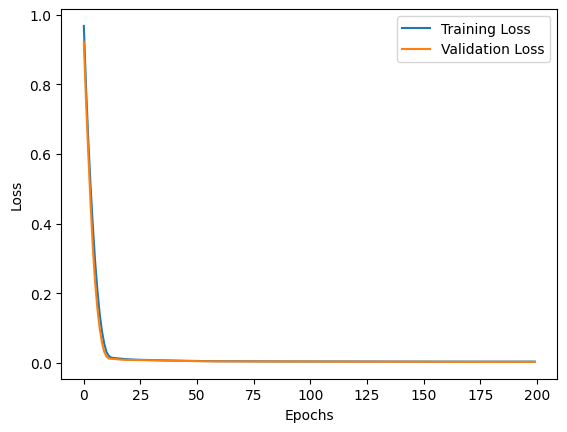

In [34]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
